# _Name:_ ***Kaan Güney Keklikçi***
# _ID:_ ***24986***
# _Assignment:_ ***LAB 3***
*********************

In [1]:
# first, mount the drive
from google.colab import drive
drive.mount("/content/drive")

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [2]:
# navigate to the directory 
%cd "/content/drive/My Drive"

/content/drive/My Drive


## ***PART 1***

> _A little puzzle_

>> ***_PART 1 Answers;_***

>>> ***1)*** _Scores of gap penalty, mismatch and match for the given matrix:_

>>>> ***Match:*** _8_

>>>> ***MisMatch:*** _-5_

>>>> ***GapPenalty:*** _-3_

>>> ***2)*** _A couple of DNA sequences that could possibly match the matrix scores:_

>>>> ***Sequence 1:*** _A A A A T C C A T_ _(Horizontal)_

>>>> ***Sequence 2:*** _C A A A S M T C C C_ _(Vertical)_

>>> ***3)*** _Trace-back arrows provided in an embedded image to the notebook:_

>>>> ![alt text](https://drive.google.com/uc?id=1fC0A2_25vGHdgjpHfy3kuoQuxJsauqlN)

>>> ***4)*** _Finally, the alignment:_

>>>> _First Seq_: ***A A A A  -  -  T C C A T***

>>>> _Second Seq_: ***C A A A S M T C C - C***

**************************


## ***PART 2***

> _Consevation in Multiple Sequence Alignments_

>> ***_PART 2 includes the following;_***

>>> ***1)*** _Entropy BarPlot & Conservation ScorePlot_

>>> ***2)*** _Comments on highly conserved positions_

>>> ***3)*** _Comments on functionality & structure_

**************************

# ***2)***

> ### ***a)*** _You may find the code below for file parsing & extracting & calculating entropy & plotting the graph._

*************

In [3]:
import sys 

filename = input("Please enter the filename for entropy scoring analysis: ")

if(filename != "GAL4_MSA_aln.txt"):
  sys.exit()
else:
  print("Correct filename, proceed granted!")

Please enter the filename for entropy scoring analysis: GAL4_MSA_aln.txt
Correct filename, proceed granted!


In [0]:
# traverse the file 
with open(filename, "r") as f:
  terminate = True
  countline = 0
  contents = []
  while(terminate):
    line = f.readline()
    if not line:
      terminate = False
    if(line.count(">") == 0):
      contents.append(line.replace("\n",""))
  f.close()

# eliminate the last line -> empty
del contents[-1]

# now, group-up the sequences in groups of 3 because a sequence is consisted of 3 lines
def grouper(contents):
  # create a new array instance for the sequence groups 
  sequences = []
  index = 0 
  to_be_added = ""
  while(True):
    sub = contents[index:index+3]
    for line in sub:
      to_be_added += line
    # add to the new instance
    sequences.append(to_be_added)
    # reset
    to_be_added = ""
    index += 3
    if(index == len(contents)):
      return sequences 

# get sequences, finally adjusted accordingly 
sequences = grouper(contents)

In [5]:
# measure whether all sequences are of same length
def ConstantLineLength(sequences):
  checker = len(sequences[0]) # initial length
  for line in range(1,len(sequences)):
    if(len(sequences[line]) != checker):
      return 0
  return 1
  
# sequence length check 
if(ConstantLineLength(sequences) == 0):
  print("All sequences are not the same length!")
  sys.exit() # finish up here
else:
  print("All sequences are of same length, proceed!")


# count the occurrences of the letter
def Counter(col_nucleotide,letter):
  count = 0
  for x in range(len(col_nucleotide)):
    if(col_nucleotide[x] == letter):
      count += 1
  return count

# remove duplicates for frequency count
def GetDistintValues(col_nucleotide):
  distinct = []
  for letter in col_nucleotide:
    if letter not in distinct:
      distinct.append(letter)
  return distinct

# entropy calculator
import math # for log
def GetEntropy(col_entropy,col_nucleotide):
  total = len(col_nucleotide)
  distinct = GetDistintValues(col_nucleotide)
  index = 0
  letterCount = 0
  col_score = 0 
  prob = 0
  while(index != len(distinct)):
    letter = distinct[index]
    letterCount = Counter(col_nucleotide,letter)
    prob = letterCount / total
    col_score += (-1*prob*(math.log(prob,2)))
    # increment the index
    index += 1
  return col_score

# calculate entropy score for each column 
col = []
index_end = len(sequences[0]) # pick the initial, all are same
index_start = 0
col_nucleotide = []
col_entropy = [] # column entropy
while(index_start != index_end):
  for line in sequences:
    col_nucleotide.append(line[index_start])
  # calculate entropy here
  col_entropy.append(GetEntropy(col_entropy,col_nucleotide))
  col_nucleotide = [] # reset 
  index_start += 1 # shift
print("Entropy scores are calculated, plotting the graph...")

All sequences are of same length, proceed!
Entropy scores are calculated, plotting the graph...


Creating the figure for entropy scores...


<Figure size 432x288 with 0 Axes>

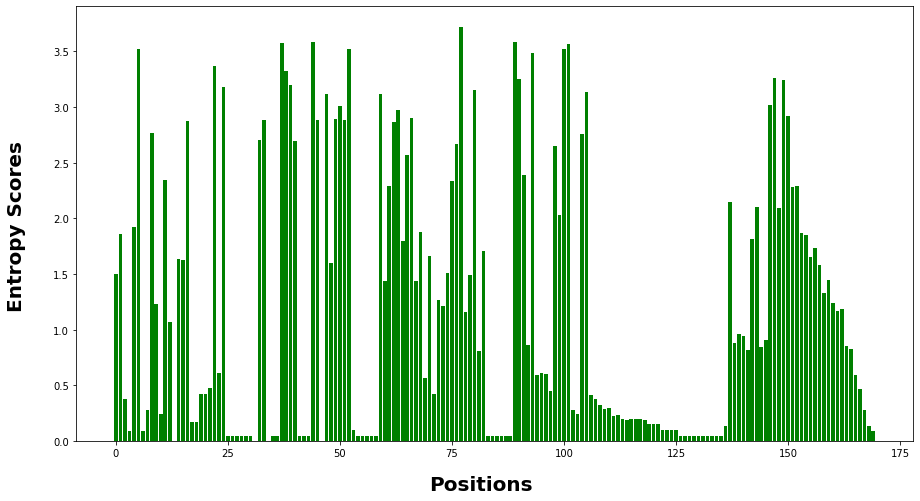

In [12]:
import matplotlib.pyplot as plt # for plots 
import numpy as np 
# positions
x_coord = np.arange(index_end)
# scores 
y_coord = np.array(col_entropy)
fig = plt.figure()
print("Creating the figure for entropy scores...")
fig, ax = plt.subplots(figsize = (15,8))
plt.bar(x_coord,y_coord,width=0.8,color="g")
fig.text(0.5,0.05, "Positions", ha="center", va="center", fontsize=20,fontweight="bold")
fig.text(0.07,0.5, "Entropy Scores", ha="center", va="center", rotation=90, fontsize=20,fontweight="bold")
plt.show()

In [9]:
# get the max % min entropy scores found
print("Maximum entropy score for a column is ({:03.2f}).".format(np.max(col_entropy)))
print("Minimum entropy score for a column is ({}).".format(np.min(col_entropy)))

Maximum entropy score for a column is (3.72).
Minimum entropy score for a column is (0.0).


> ### ***COMMENTS on highly-conserved positions:***
>> ***->*** _After navigating to Uniprot and examining the metal binding positions 11 - 38, it is easy to see that these positions specifically correspond to the highest entropy spikes in the graph._

>> ***->*** ***_Therefore, these regions; since they correspond to the entropy score spikes in the plot, are used to bind those._*** Futher examination reveals that these regions are:

>>> ***->*** _Position 11: Zinc 1_

>>> ***->*** _Position 11: Zinc 2_

>>> ***->*** _Position 14: Zinc 1_

>>> ***->*** _Position 21: Zinc 1_

>>> ***->*** _Position 28: Zinc 1_

>>> ***->*** _Position 31: Zinc 2_

>>> ***->*** _Position 38: Zinc 2_

> ***_Note that, these positions generally have a sequence step-size of 7 and the corresponding nucleotide is "C"._***

*******************

## ***2)***

> ### ***b)*** _You may find the code below for scaled conservation scores to the [0-10] range such that highly conserved positions get a higher score._

***********

Creating the figure for conservation scores...


<Figure size 432x288 with 0 Axes>

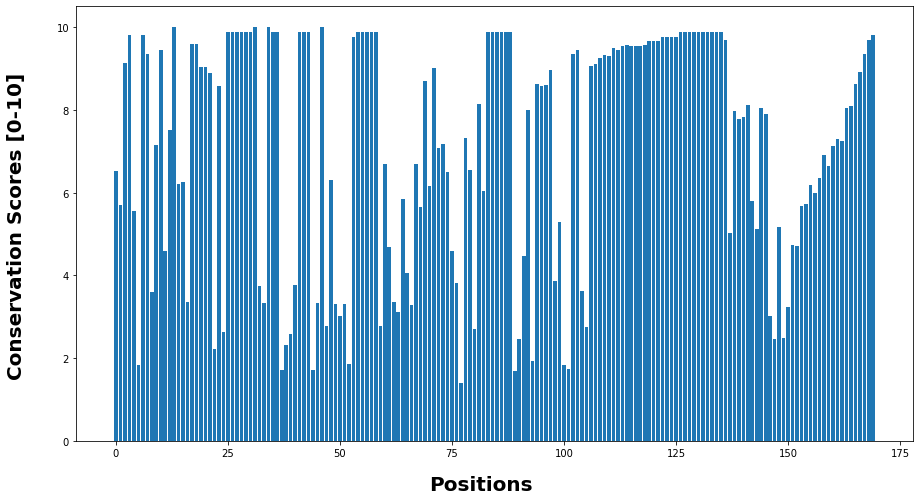

In [24]:
# use entropy to calculate for conservation score vs position
ScaledScores = []

# convert the entropy to conservation scores by using this formula -> ((maxEntropy - colEntropy) * 10 / maxEntropy)
# maxEntropy happens where all amino acids have equal probability = 1/20
# maxEntropy - entropy = conservation

# calculate max entropy
equal_prob = 0.05
dummy = 0 
get_max_entropy = lambda dummy : (-20 * math.log(equal_prob,2) * equal_prob)
max_entropy = get_max_entropy(dummy)

# scale using the formula above
def scale(col_entropy,max_entropy,ScaledScores):
  for entropy in col_entropy:
    scaled = ((max_entropy - entropy) / max_entropy)*10
    ScaledScores.append(scaled)
  return ScaledScores

# plot for conservation scores
ScaledScores = scale(col_entropy,max_entropy,ScaledScores)
# positions
x_coord = np.arange(index_end)
# scores 
y_coord = np.array(ScaledScores)
fig = plt.figure()
print("Creating the figure for conservation scores...")
fig, ax = plt.subplots(figsize = (15,8))
plt.bar(x_coord,y_coord,width=0.8)
fig.text(0.5,0.05, "Positions", ha="center", va="center", fontsize=20,fontweight="bold")
fig.text(0.07,0.5, "Conservation Scores [0-10]", ha="center", va="center", rotation=90, fontsize=20,fontweight="bold")
plt.show()

## ***2)***

> ### ***c)_Yes, they do have functional significance._***

>> _* Highly conserved regions act as metal binders, in fact, they bind Zinc 1 & 2 ions given their positions in the graph._ 

>> _* They also act as DNA binders where the position in the nucleotide both specifies the position and type of each DNA-binding domain present within the protein._

>> _*The associated region also functions for Zn(2)-C6 fungal-type, meaning that it functions as a regulator for transcription._

***********

In [0]:
# END OF LAB 3...